<a href="https://colab.research.google.com/github/Shamiul-693/Online-Buying-Intention/blob/main/online_shoppers_intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# here i use the Data Analysis and visualization tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

#now i am use statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#here i am scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading Database
data = pd.read_csv('/content/online_shoppers_intention.csv')



In [ ]:
# shape of the data(number of rows vs number of column)
data.shape

(12330, 18)

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
missing_percentage = data.isnull().sum()/data.shape[0]


In [ ]:
missing_percentage

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

# ## There are different types of column in our dataset now #For  Revenue visualization

In [ ]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

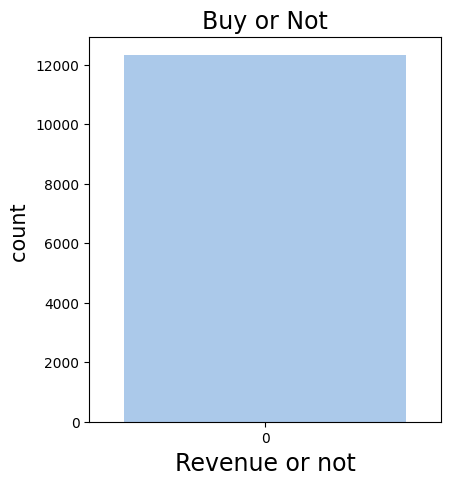

In [ ]:
# here i checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 5)

plt.subplot(1, 2, 1)
sns.countplot(data['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 17)
plt.xlabel('Revenue or not', fontsize = 17)
plt.ylabel('count ', fontsize = 15)
plt.show()

## FOR Weekend

In [ ]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

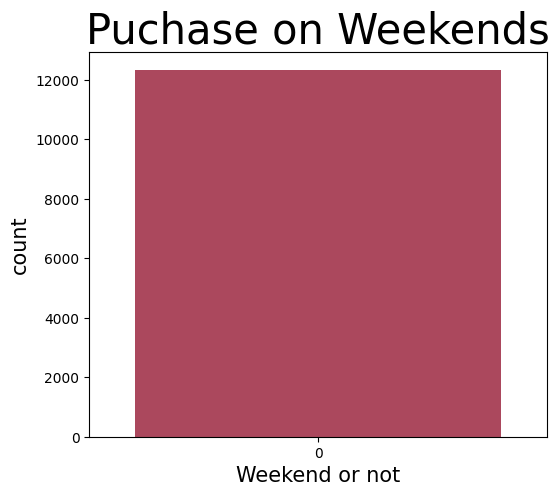

In [ ]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

###For  Operating Systems

In [ ]:

data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

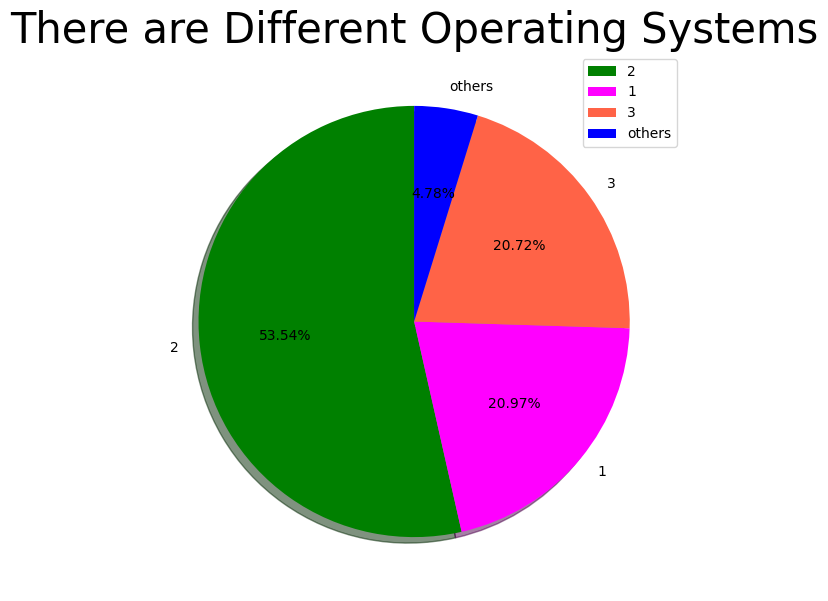

In [ ]:

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['green', 'magenta', 'tomato', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('There are Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()




## Browsers

In [ ]:
#
data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

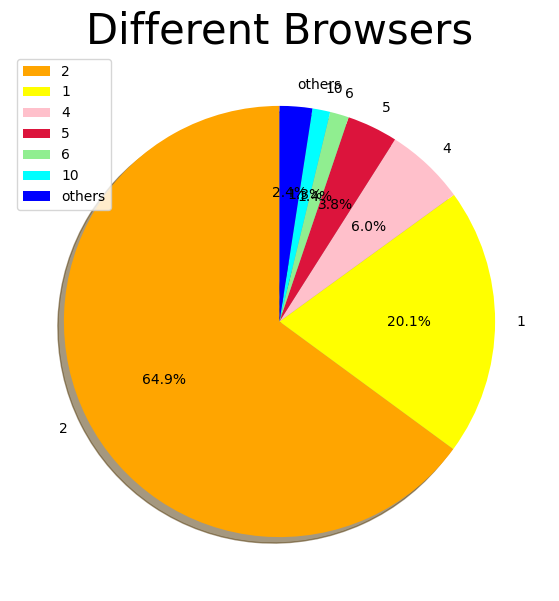

In [ ]:

plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

## Month

In [ ]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

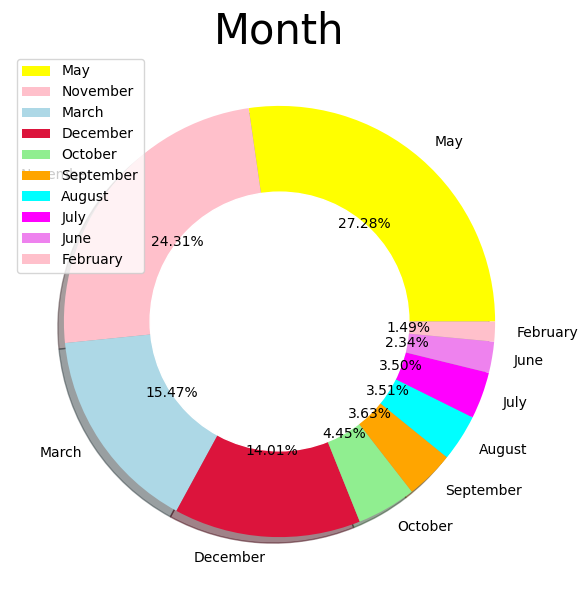

In [ ]:
# creating a donut chart for the months variations
# plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

## Visitor Type

In [ ]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

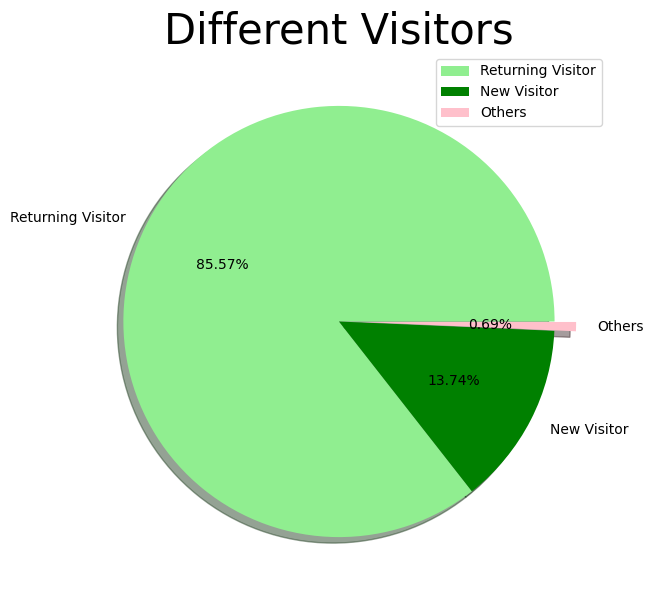

In [ ]:
# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

### Traffic Type

In [ ]:
data['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

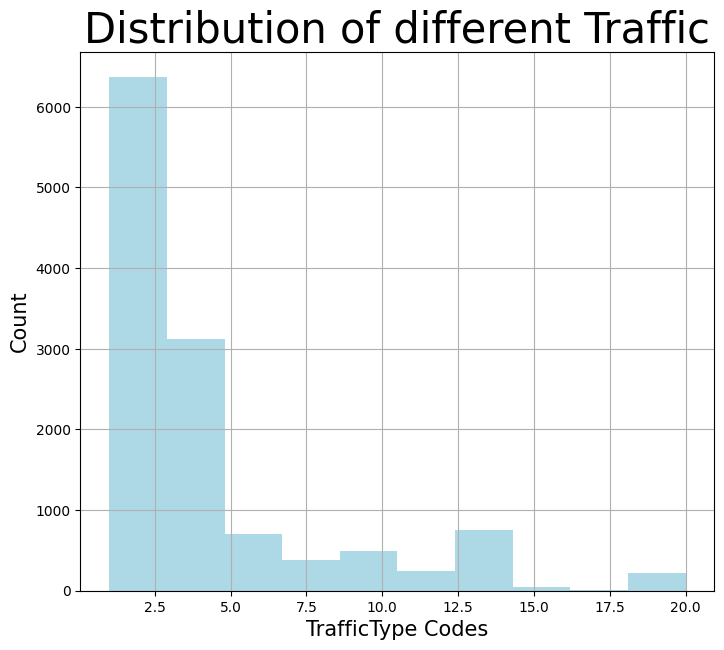

In [ ]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

#observation **
- Different type of Traffic are not normal distributed.

## Region

In [ ]:
data['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

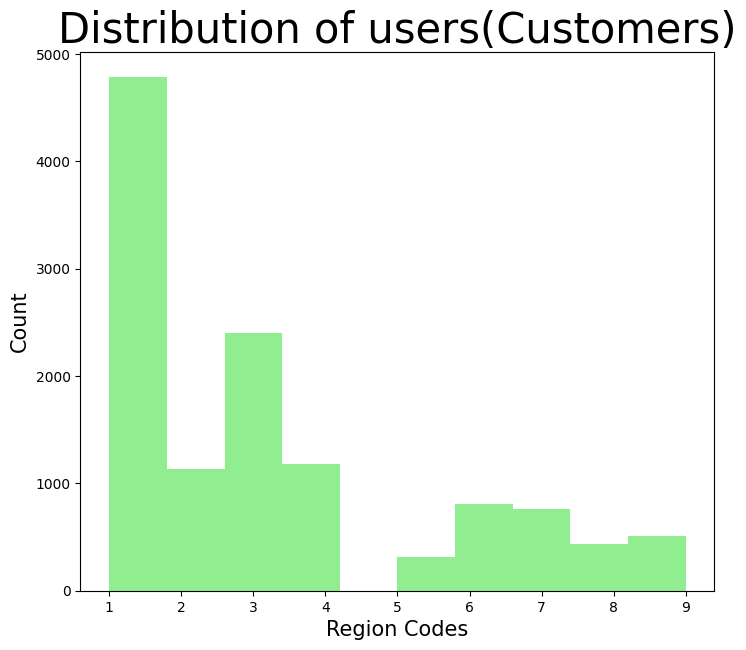

In [ ]:
# visualizing the distribution of the users around the Region
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['Region'], color = 'lightgreen')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

#** observation **
- Different type of users with respect to region are not normal( distributed.

In [ ]:
data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

## Weekend vs Revenue

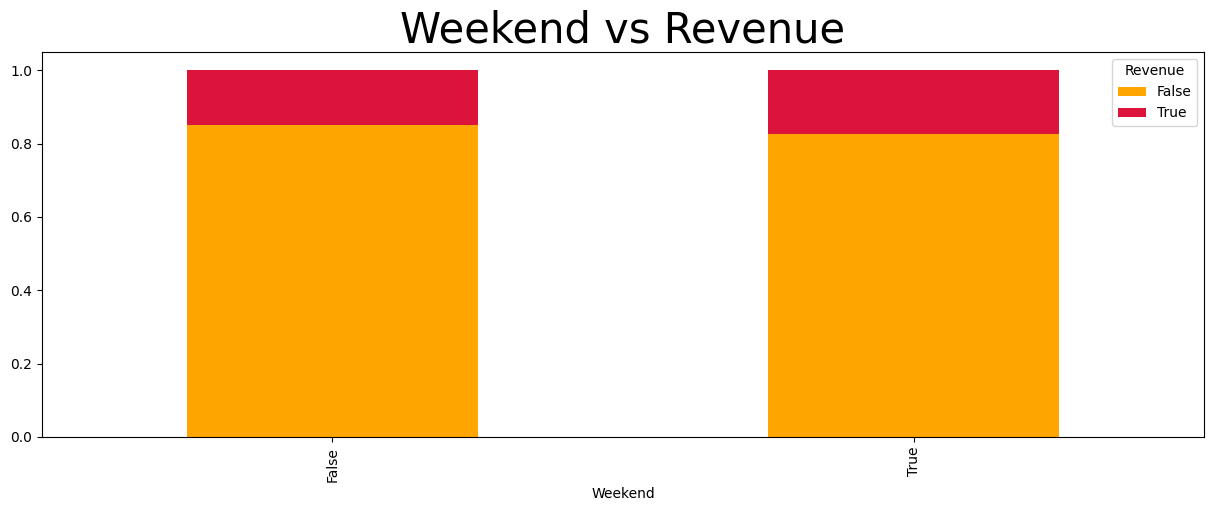

In [ ]:
# bar plot for weekend vs Revenue
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

## Traffic Type vs Revenue

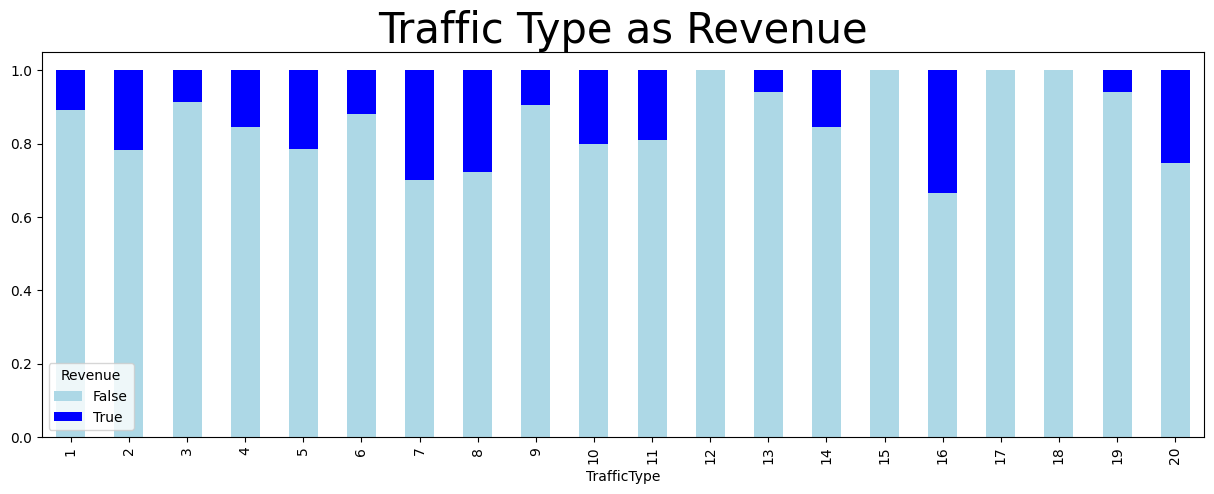

In [ ]:
# bar plot for traffic type vs revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Traffic Type as Revenue', fontsize = 30)
plt.show()

## Visitor type vs revenue

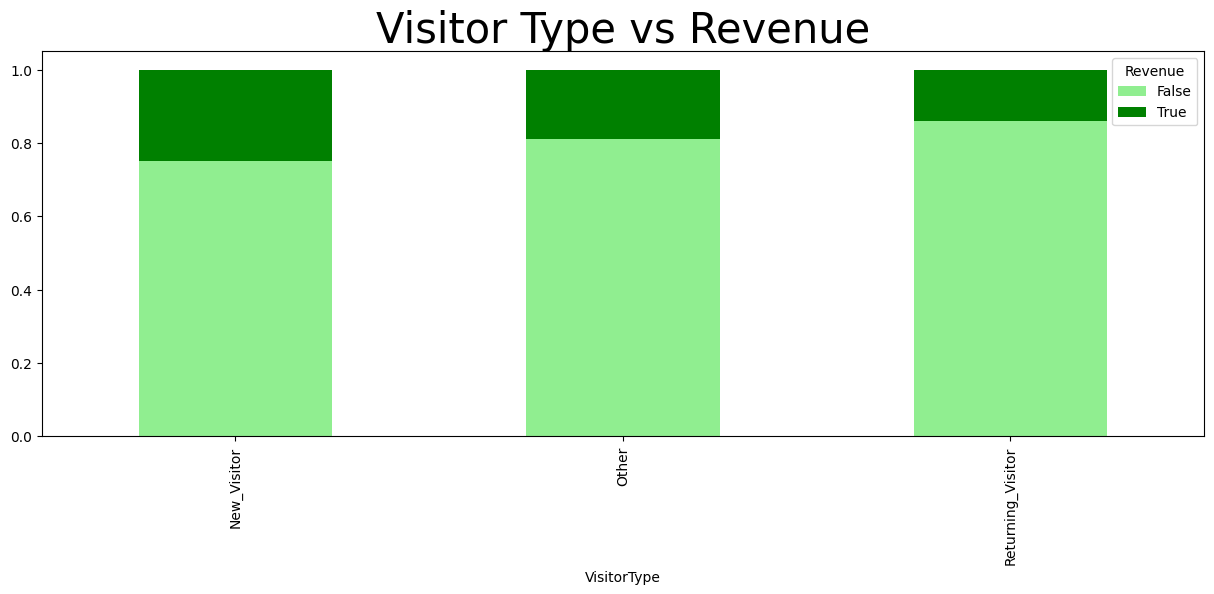

In [ ]:
# bar plot for visitor type vs revenue
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize =(15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

## Region vs Revenue

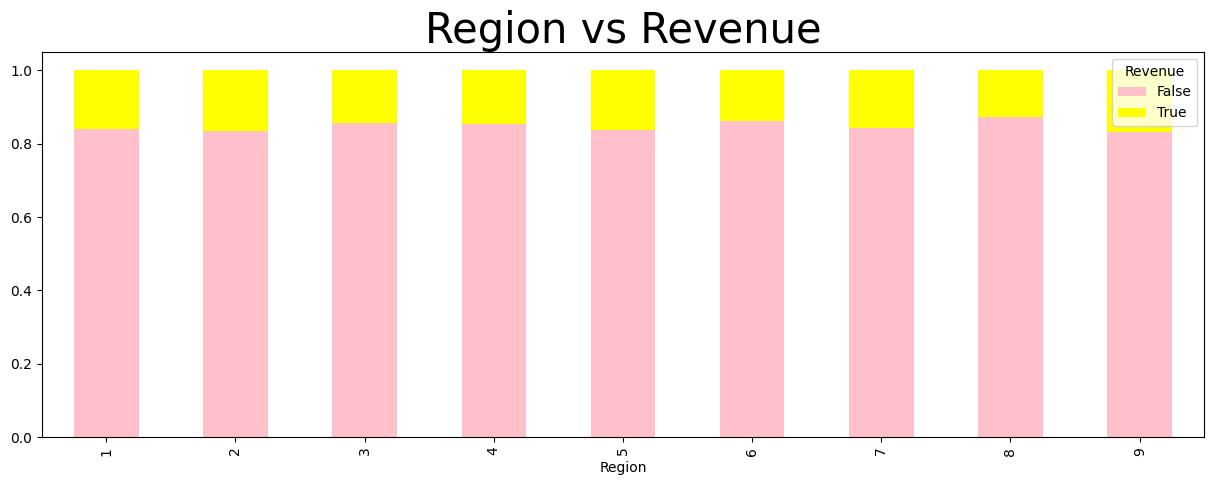

In [ ]:
# bar plot for region vs revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'yellow'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

## Multi-variate Analysis
- month vs pagevalues w.r.t. revenue
- month vs exitrates w.r.t. revenue
- month vs bounceRates w.r.t. Revenue
- visitor type vs BounceRates w.r.t. revenue
- visitor type vs exit rates w.r.t. revenue
- visitor type vs exit rates w.r.t. revenue
- region vs pagevalues w.r.t. revenue
- rigion vs exit rates w.r.t. revenue

### month vs pagevalues w.r.t. revenue

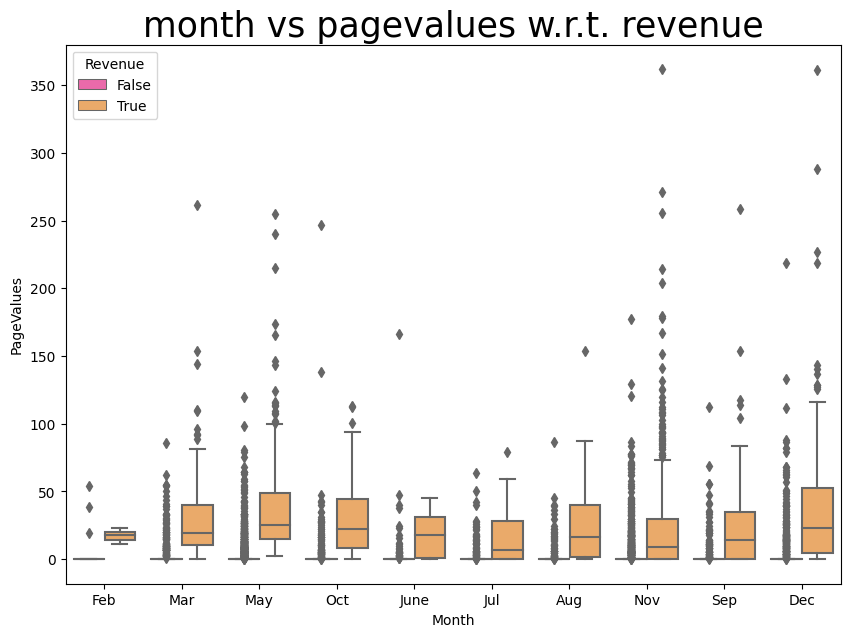

In [ ]:
# boxplot for month vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'spring')
plt.title('month vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

### month vs exitrates w.r.t. revenue

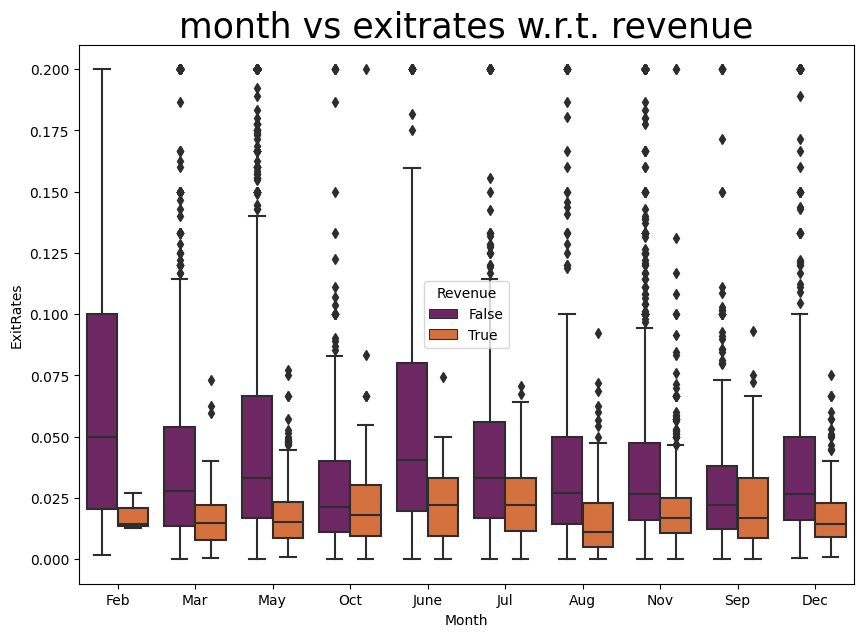

In [ ]:
# boxplot for month vs exitrates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'inferno')
plt.title('month vs exitrates w.r.t. revenue', fontsize = 25)
plt.show()

### month vs bounceRates w.r.t. Revenue

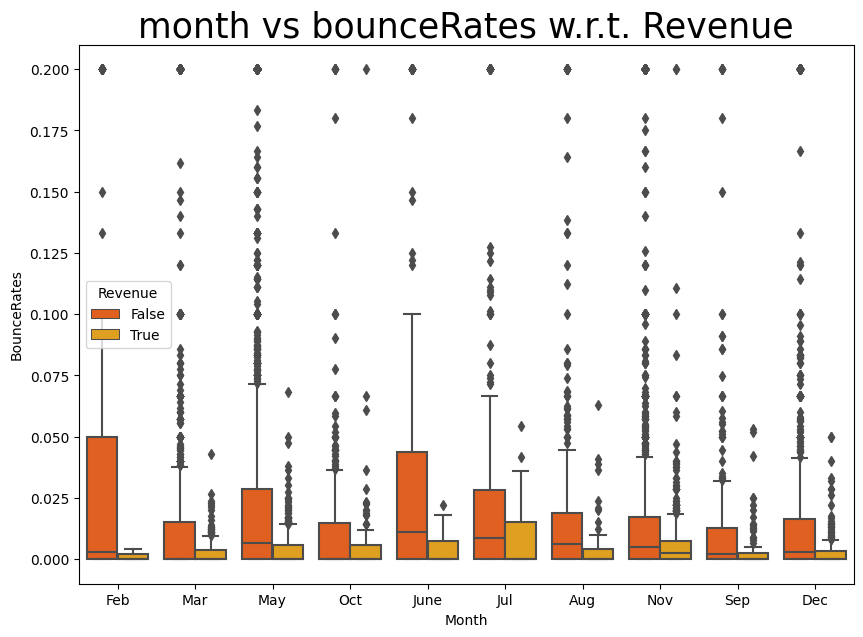

In [ ]:
# boxplot for month vs bounceRates w.r.t. Revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'autumn')
plt.title("month vs bounceRates w.r.t. Revenue", fontsize = 25)
plt.show()

## VisitorType vs BounceRates w.r.t. revenue

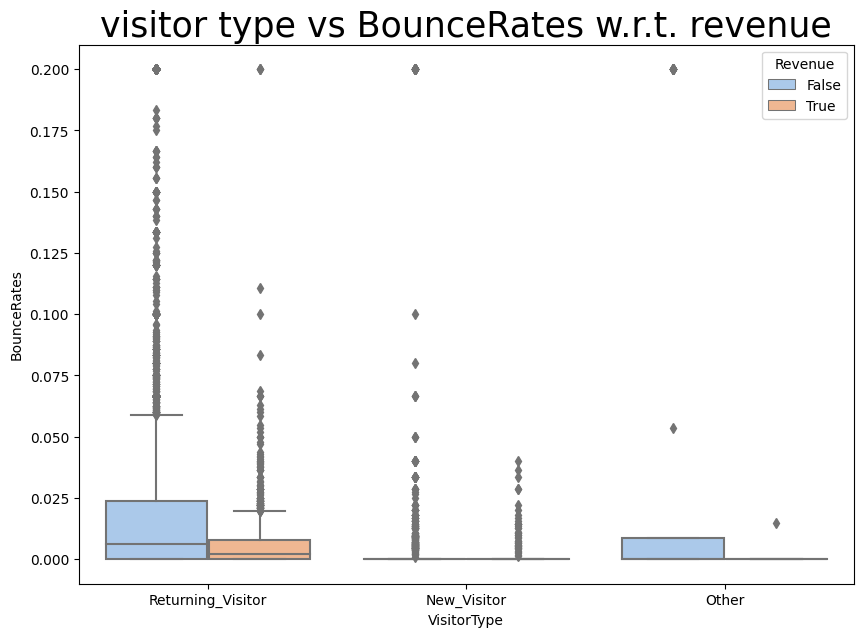

In [ ]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('visitor type vs BounceRates w.r.t. revenue', fontsize = 25)
plt.show()

## visitor type vs exit rates w.r.t. revenue

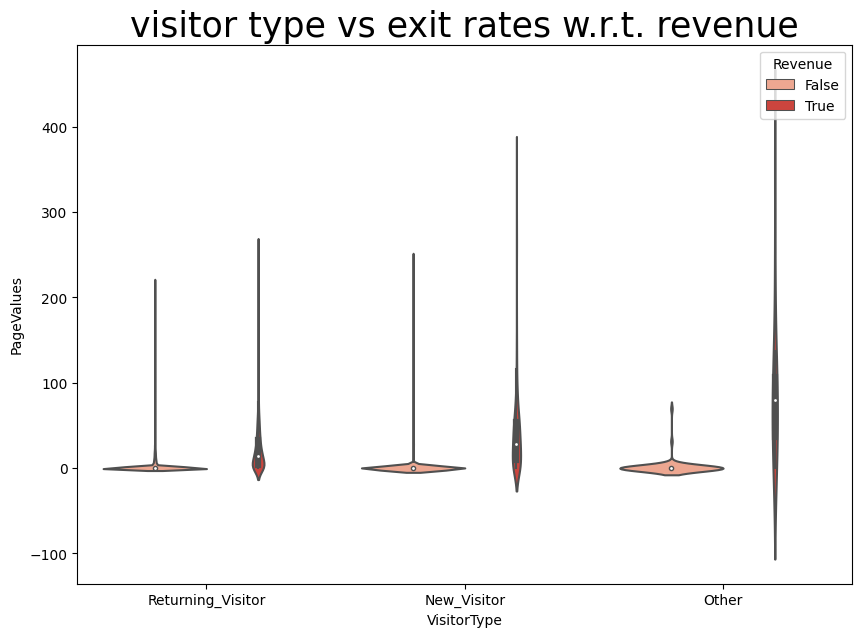

In [ ]:
# violin plot for visitor type vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'Reds')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

## visitor type vs exit rates w.r.t. revenue

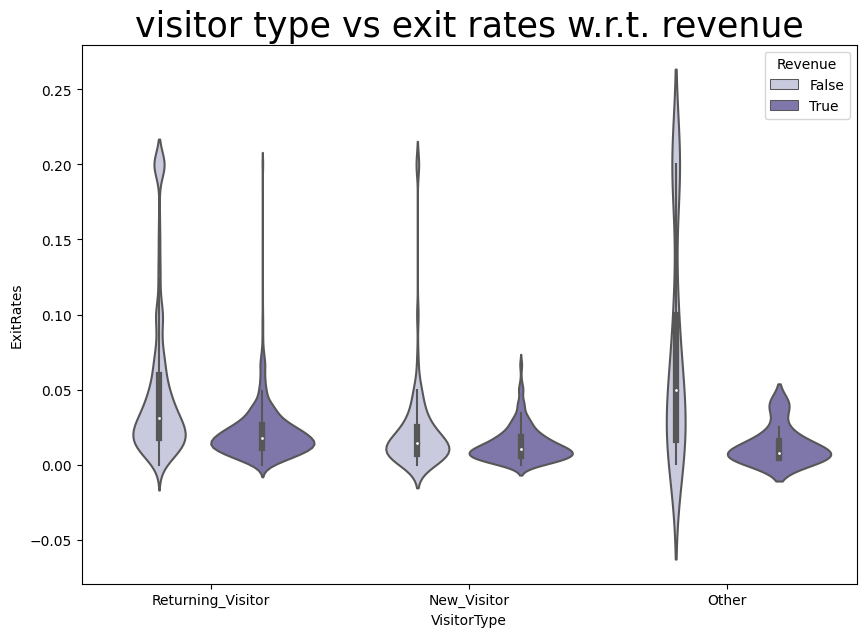

In [ ]:
# violin plot for visitor type vs exit rates wrt revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

## region vs pagevalues w.r.t. revenue

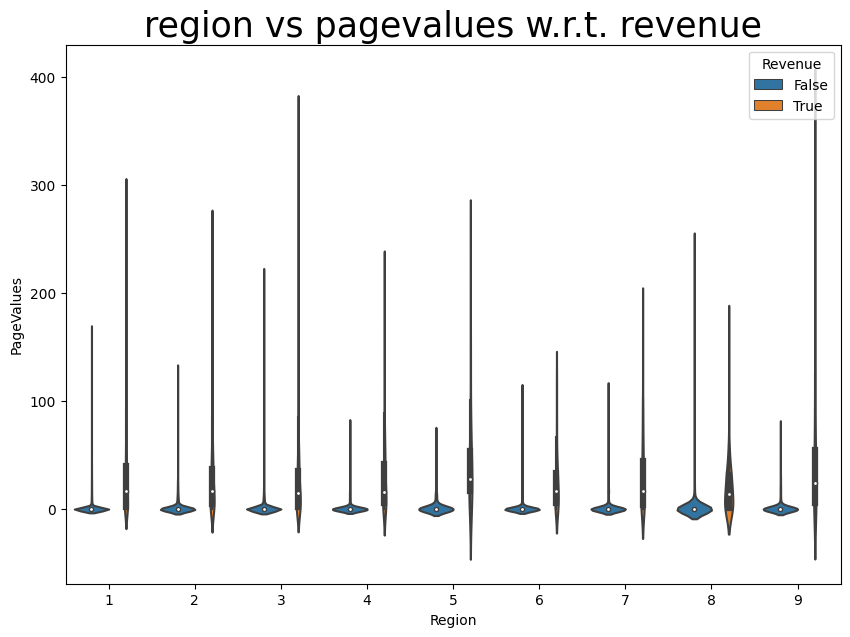

In [ ]:
# violin plot for region vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data ['Region'], y = data['PageValues'], hue = data['Revenue'])
plt.title('region vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()


## rigion vs exit rates w.r.t revenue

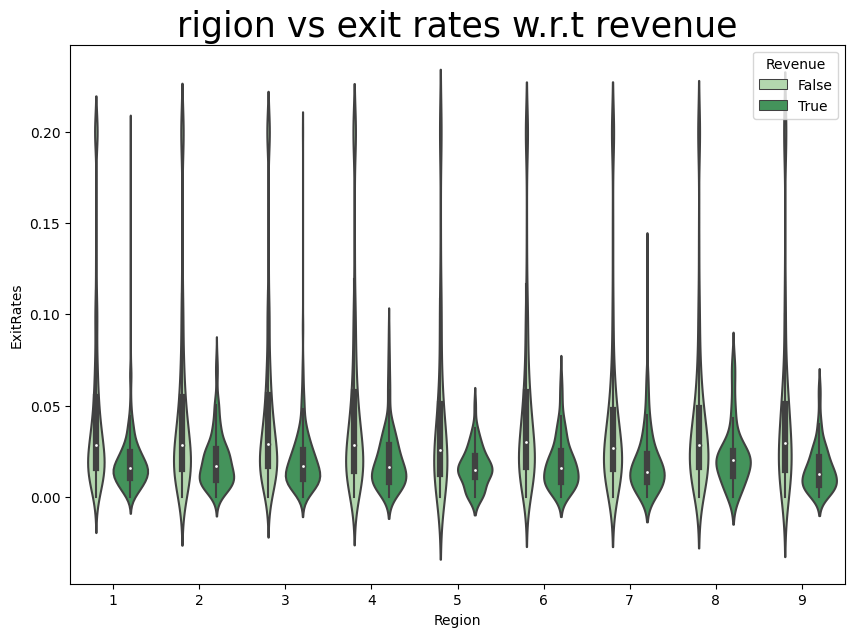

In [ ]:
# violin plot for rigion vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Greens')
plt.title("rigion vs exit rates w.r.t revenue", fontsize = 25)
plt.show()

### Summary table of multivariate Feature Analysis

In [ ]:
multivariate_feature_analysis = [
    ['month vs pagevalues', 'Revenue', 'Gaussian', 'High', 'Low', 'Low', 'High'],
    ['month vs exitrates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'Medium'],
    ['month vs bounceRates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'High'],
    ['visitor type vs BounceRates' , 'Revenue', 'Exponential', 'Low', 'High', 'Low', 'High'],
    ['visitor type vs exit rates' , 'Revenue', 'Exponential', 'Low', 'High', 'High', 'Medium'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'High', 'Low', 'High', 'Medium'],
    ['region vs pagevalues', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'High'],
    ['rigion vs exit rates', 'Revenue', 'Gaussian', 'High', 'High', 'High', 'Medium']
]
feature_summary = pd.DataFrame(multivariate_feature_analysis, columns=['Multivariate_features', 'W.R.T', 'Distribution', 'Revenue_True', 'Revenue_False', 'Outliers', 'Importance'])
feature_summary

,Multivariate_features,W.R.T,Distribution,Revenue_True,Revenue_False,Outliers,Importance
0,month vs pagevalues,Revenue,Gaussian,High,Low,Low,High
1,month vs exitrates,Revenue,Gaussian,Low,High,Medium,Medium
2,month vs bounceRates,Revenue,Gaussian,Low,High,Medium,High
3,visitor type vs BounceRates,Revenue,Exponential,Low,High,Low,High
4,visitor type vs exit rates,Revenue,Exponential,Low,High,High,Medium
5,visitor type vs exit rates,Revenue,Exponential,High,Low,High,Medium
6,region vs pagevalues,Revenue,Exponential,Low,High,High,High
7,rigion vs exit rates,Revenue,Gaussian,High,High,High,Medium


### categorical column vs target column

In [ ]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

In [ ]:
# check wheather Revenue is influenced by categorical column
# Null Hypopthesis, H0 = proportion of revenue accross the category is same
# Alternative Hypothesis, H1 = proportion of revenue at least in two category is different
scol = []
spval = []
ss = []
for n in cat_cols:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(data[n], data['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant


In [ ]:
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


### Numerical Column vs Target

In [ ]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [ ]:
from scipy.stats import levene

# Two-Sample T-test
tcol = []
tpval = []
ts = []
for n in numerical_columns:
    tcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = data[n][data['Revenue'] == False]
    g2 = data[n][data['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    for b in [g1]:
        s, p = shapiro(b)
    for c in [g2]:
        s1, p1 = shapiro(c)
    if p > 0.05 or p1 > 0.05:
        w, lp = levene(g1, g2)
    # If doesn't pass normality or variance test, we do non-parametric Test(mannwhitneyu Test)
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        ms, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))
    if mp < 0.05:
        ts.append('*')  # significant
    else:
        ts.append('**') # not significant


In [ ]:
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})

,Feature,P-Value,Significance
0,Administrative_Duration,0.0,*
1,Informational_Duration,0.0,*
2,ProductRelated_Duration,0.0,*
3,BounceRates,0.0,*
4,ExitRates,0.0,*
5,PageValues,0.0,*


## Outliers

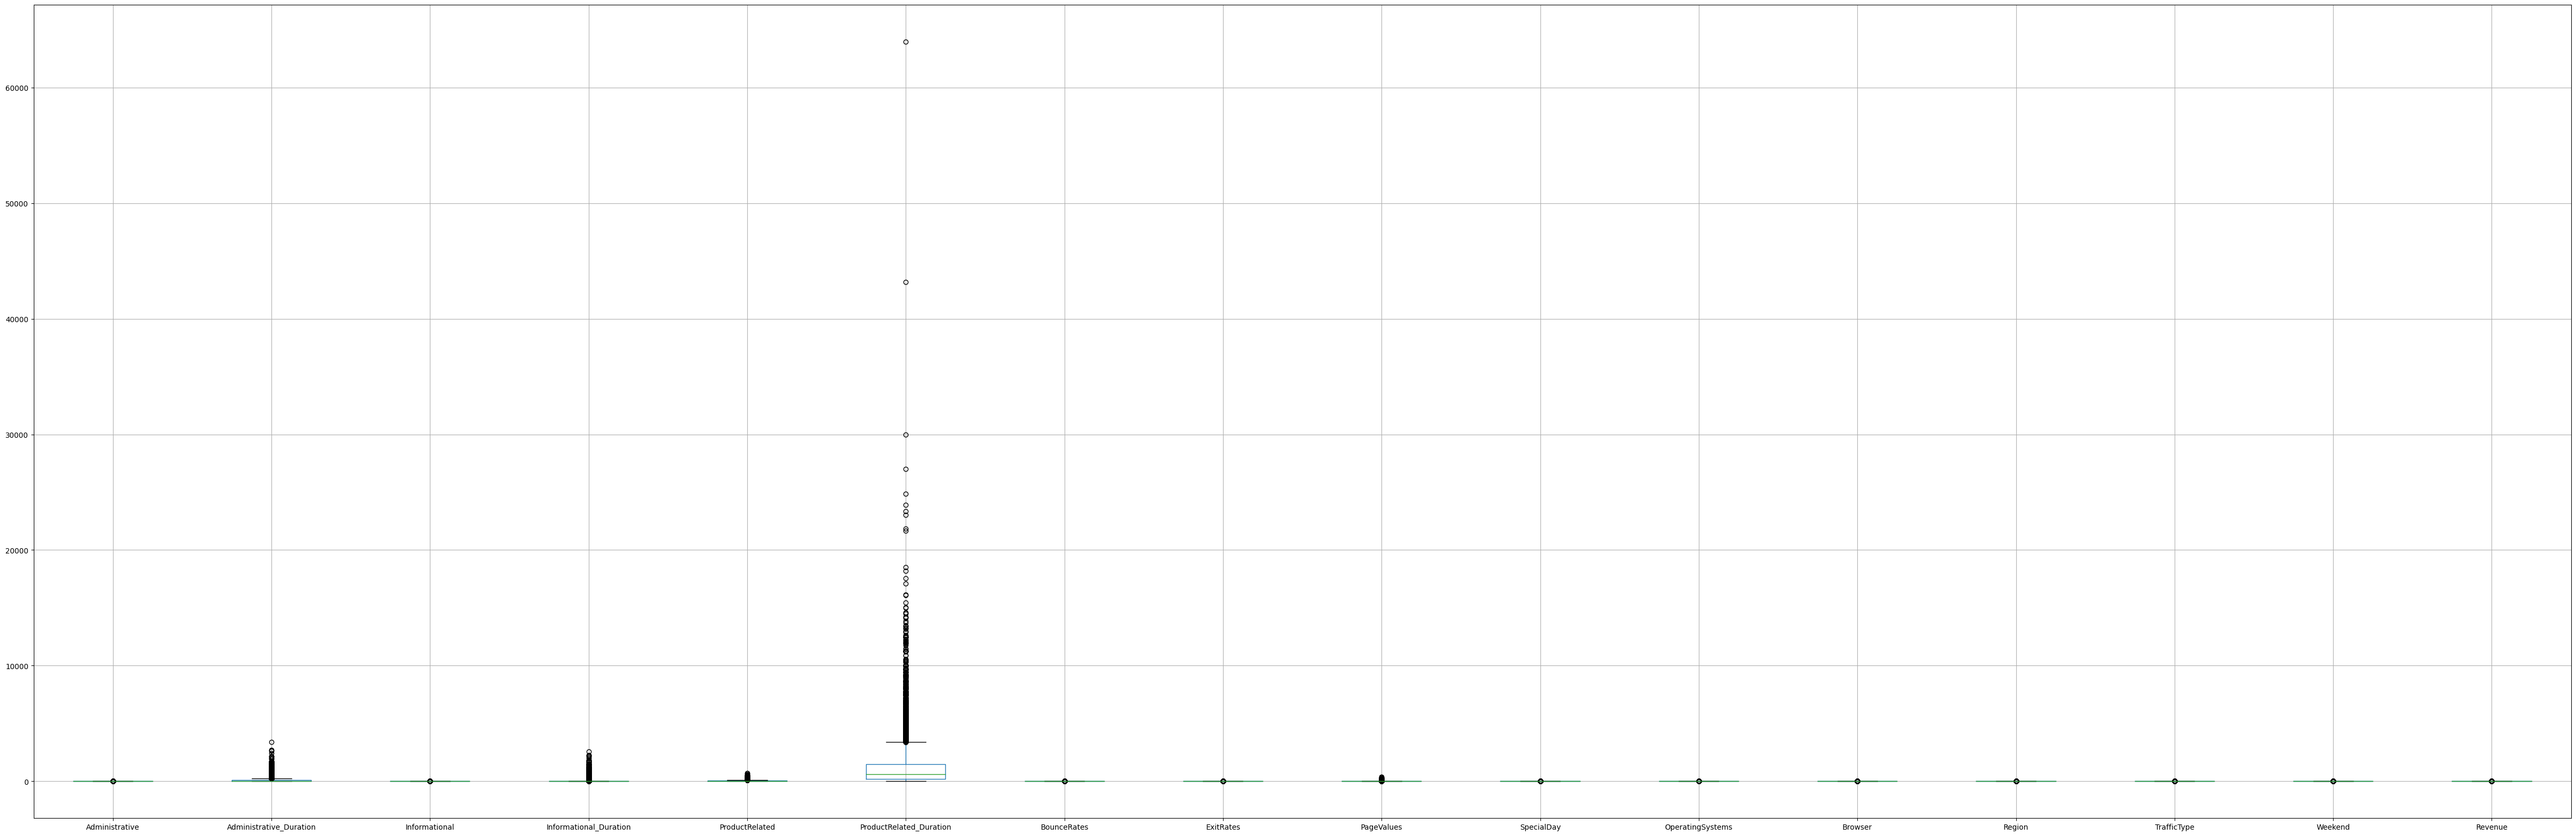

In [ ]:
plt.figure(figsize=(62, 20))
data.boxplot();

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numerical_columns:
    data_mean, data_std = mean(data[i]), std(data[i])

    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]

    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outliers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outliers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outliers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outliers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outliers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outliers: 2.1005677210056772 



# Visualization of Outliers

In [ ]:
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
4,ExitRates,5.782644
3,BounceRates,5.742092
5,PageValues,2.100568
0,Administrative_Duration,1.881590
1,Informational_Duration,1.865369
2,ProductRelated_Duration,1.776156


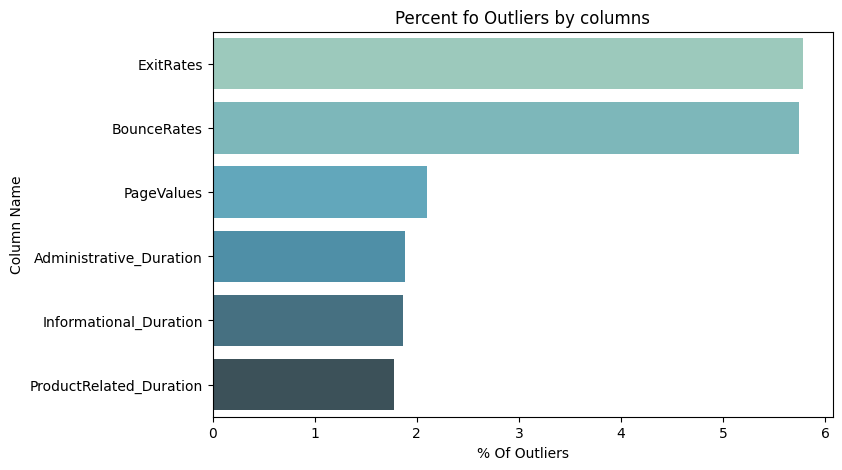

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Column Name')
plt.show()

In [ ]:
# Imputing Missing Values with 0
data.fillna(0, inplace = True)

#checking the no. of null values after imputing
data.isnull().sum().sum()

0

## Administrative Duration vs Bounce Rates

Shape of the dataset:  (12330, 2)


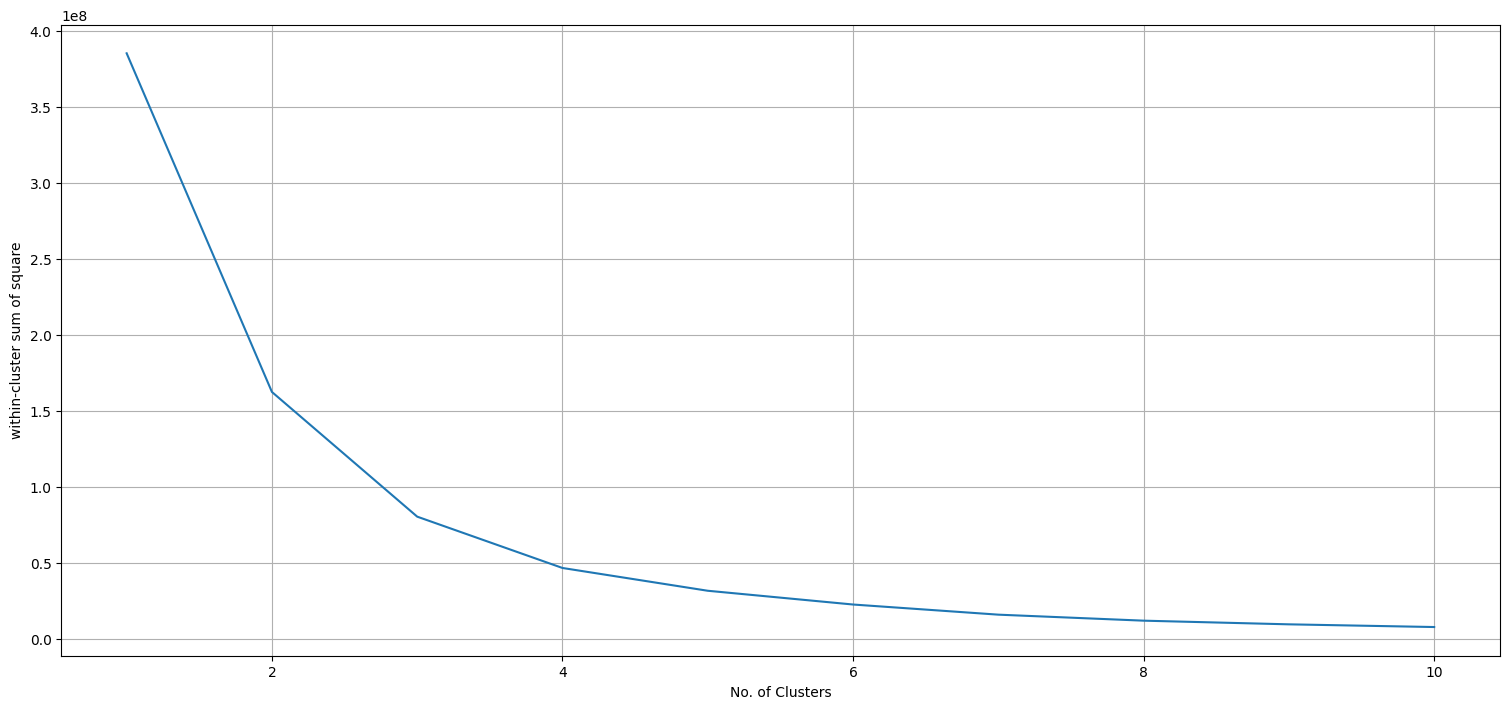

In [ ]:
# Time spent by the Users on website vs Bounce Rates
# let's cluster Administrative duration and bounce Rates to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [1, 6]].values

# checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10,
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

### Visualizing the Cluster using scatter plot

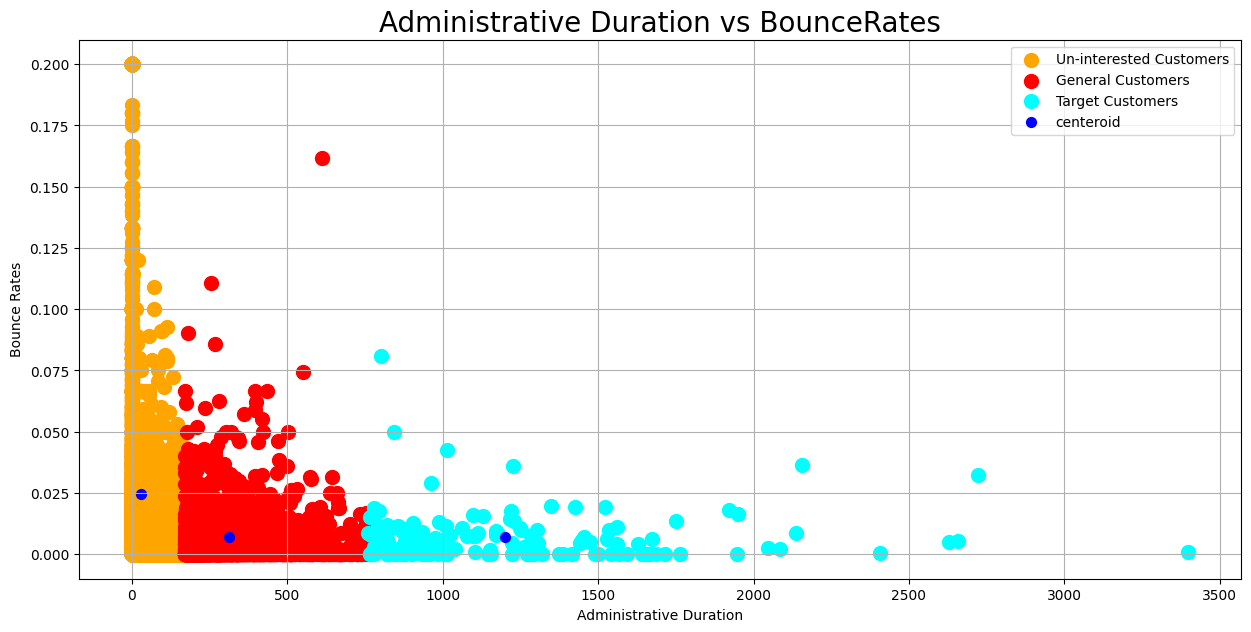

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

## Informational Duration vs Bounce Rates

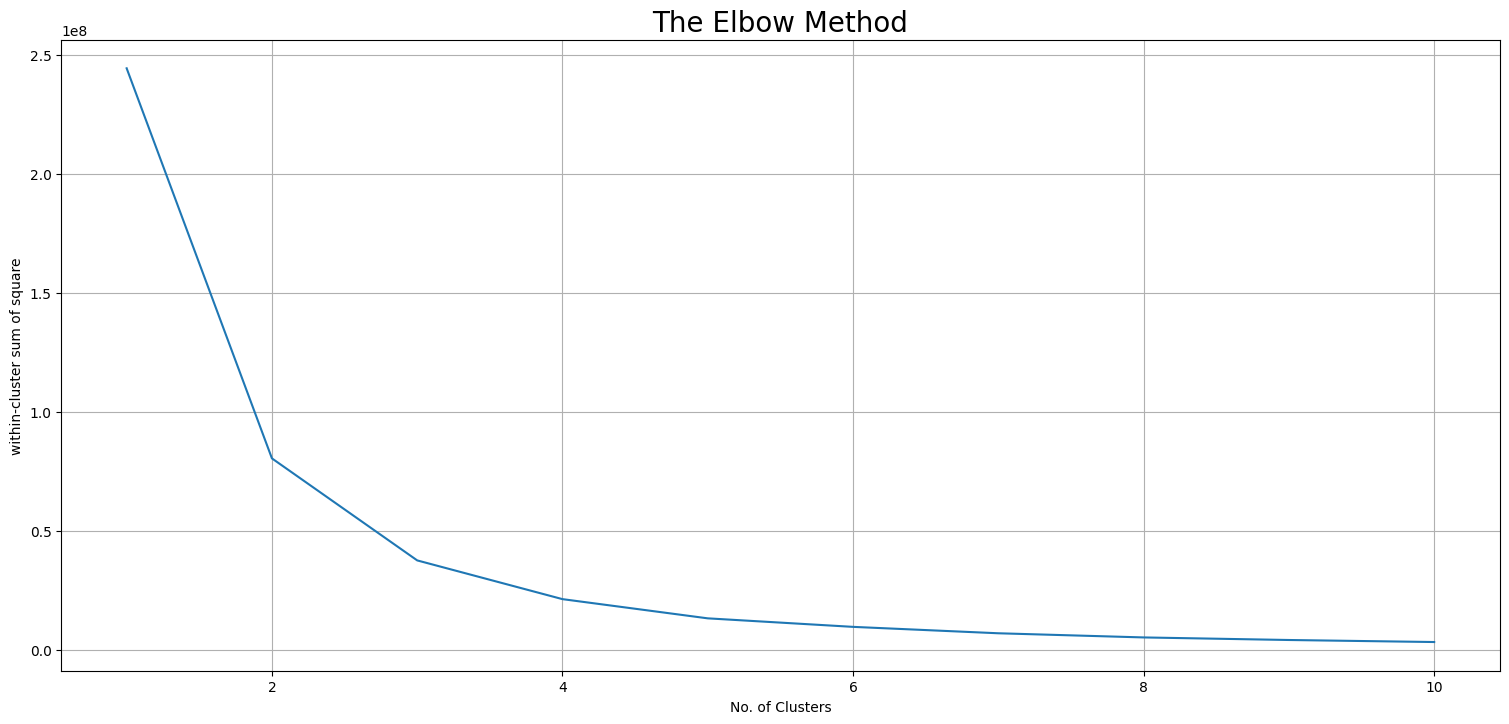

In [ ]:
# cluster anaysis of Informational Duration vs Bounce Rates
x = data.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('within-cluster sum of square')
plt.show()

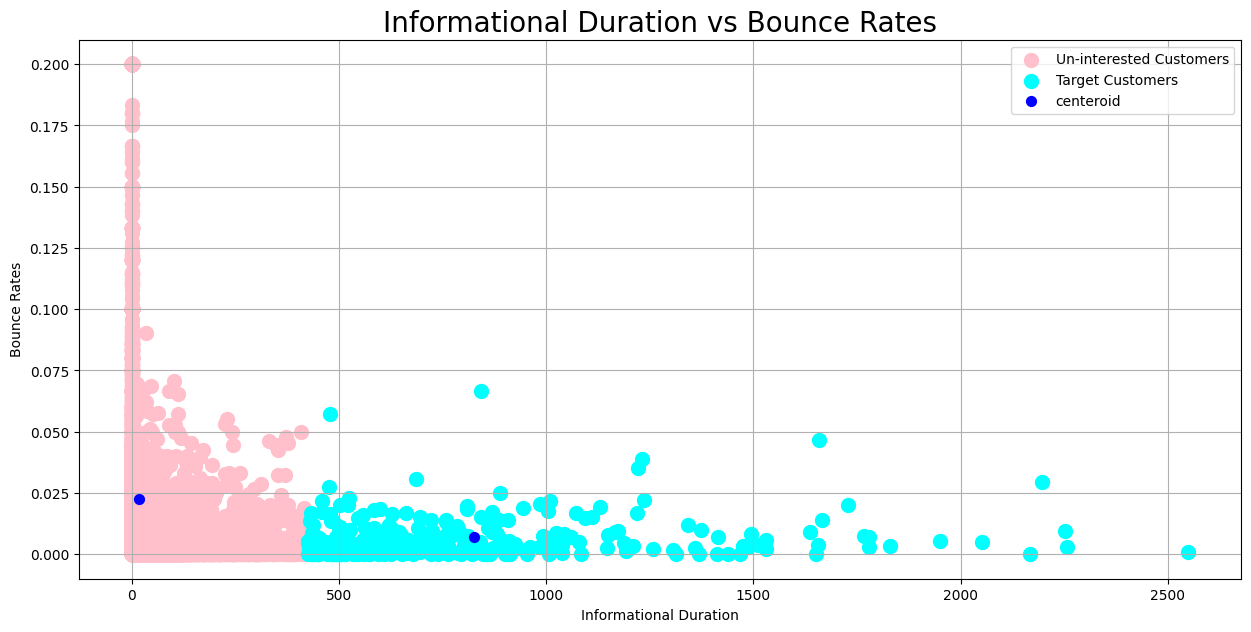

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

## Administrative Duration vs Exit Rates

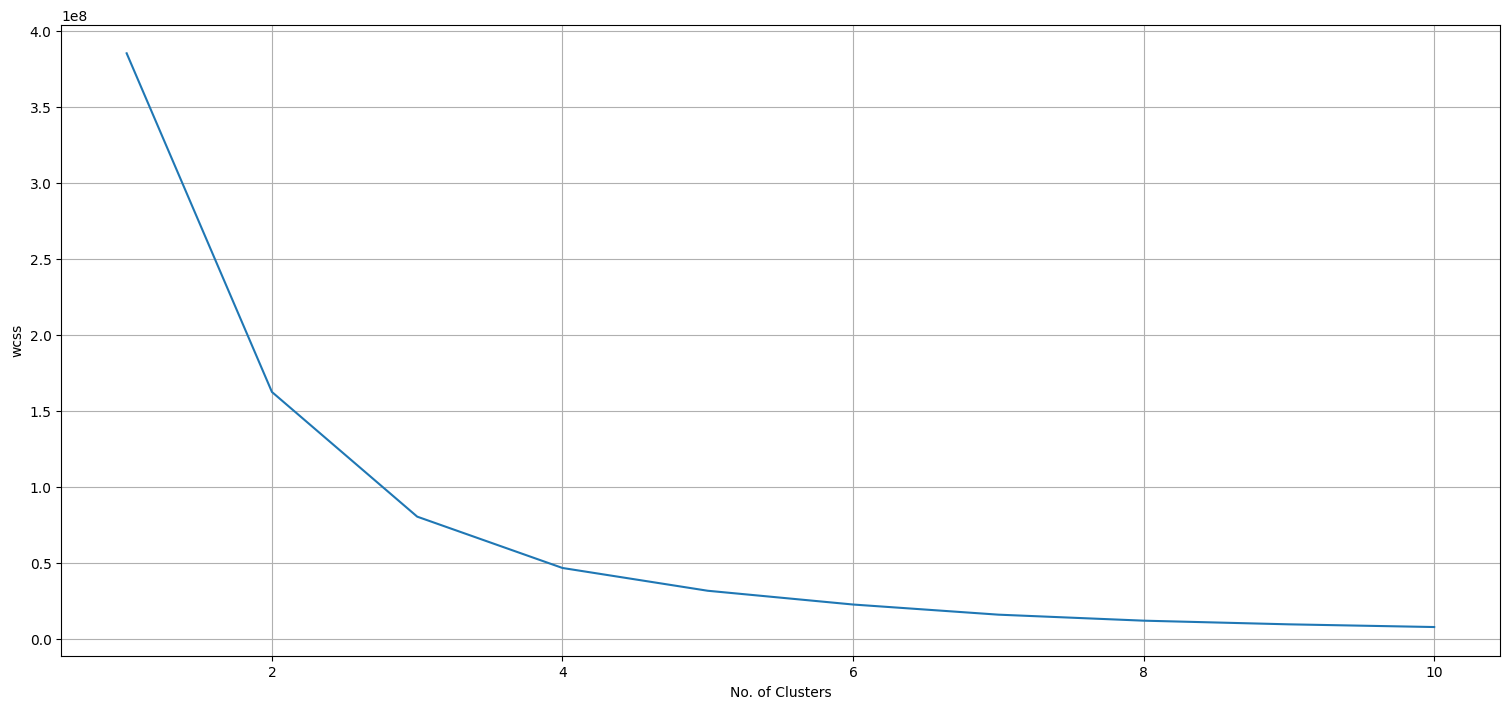

In [ ]:
# informational duration vs Bounce Rates
x = data.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 200,
               n_init = 10,
               random_state = 0,
               algorithm = 'elkan',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**What is the observation point here?**
- According to the above plot, the maximum bend at index 3, that is number of optimal no. of Clusters for Administrative Duration and Exitrates is 2. Let's go the next step, i.e., Plotting the Clusters.


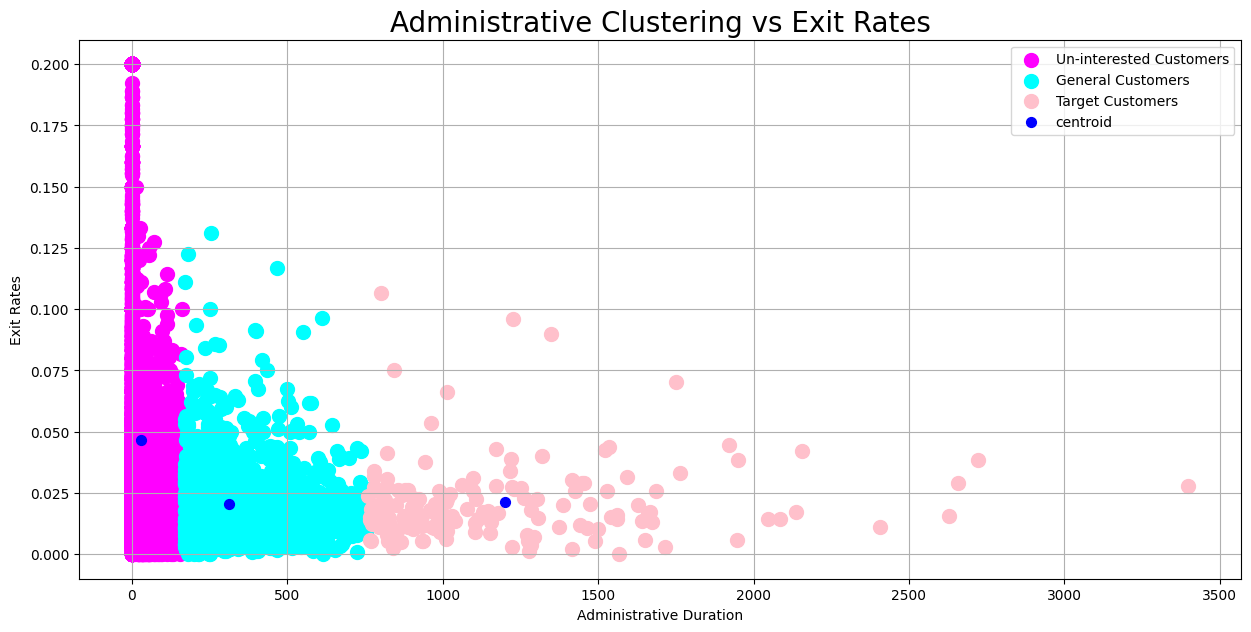

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'magenta', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

## Region vs Traffic Type

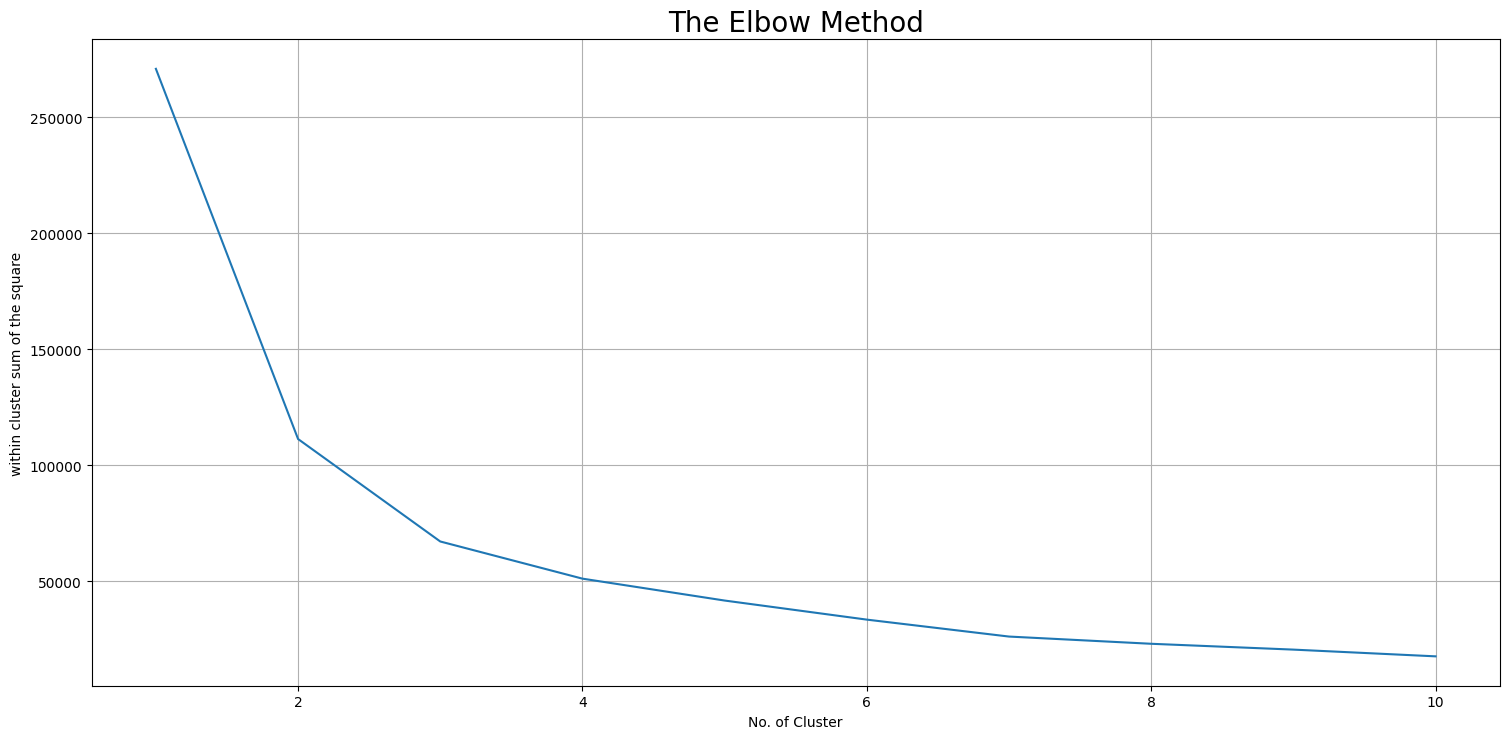

In [ ]:
# Region vs TrafficType clustering
x = data.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 200,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Cluster')
plt.ylabel('within cluster sum of the square')
plt.show()

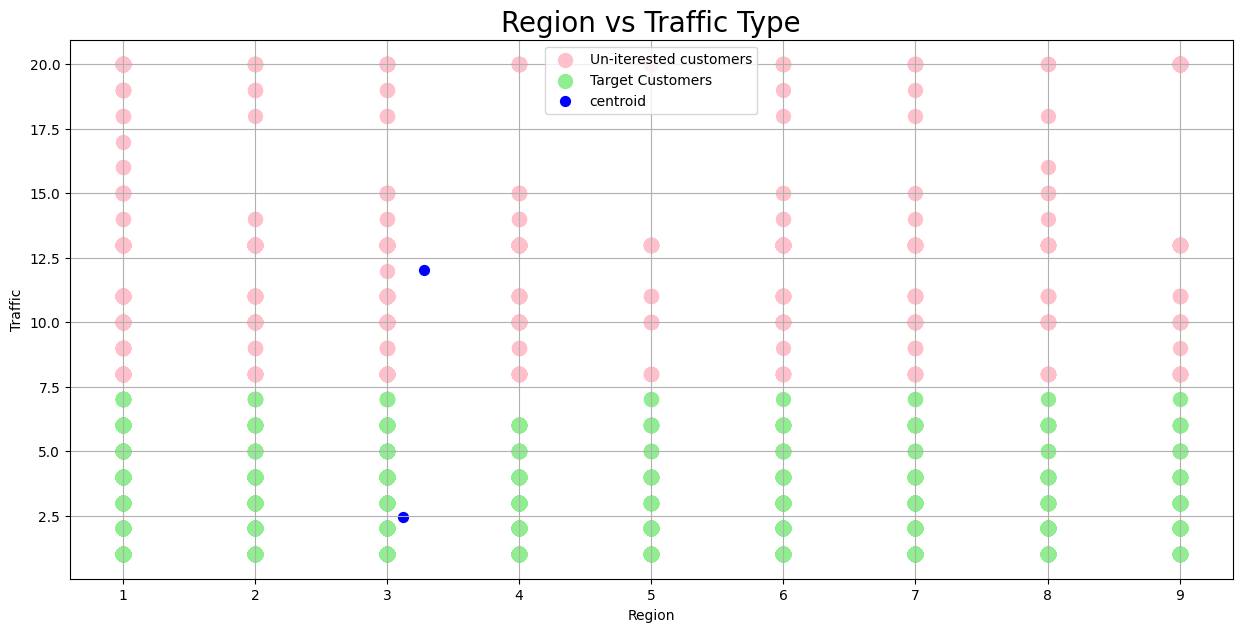

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-iterested customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'lightgreen', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.grid()
plt.show()

**What is the observation point here?**
- We see at this clustering plot, we can say that the customers who is from Region 2, 4, 5 have less traffic than others.

## Adminstrative Duration vs Region

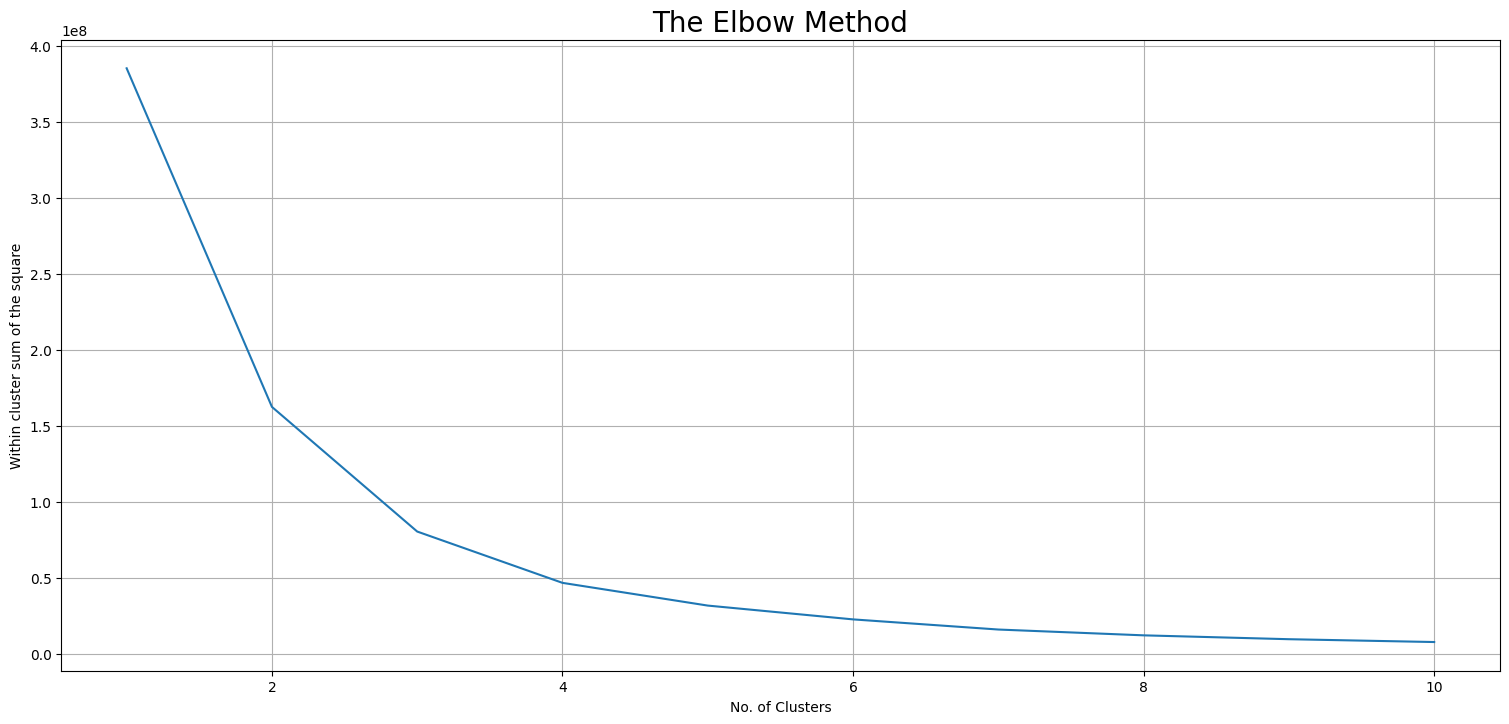

In [ ]:
# administrative duration vs bounce rates
x = data.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Within cluster sum of the square')
plt.show()

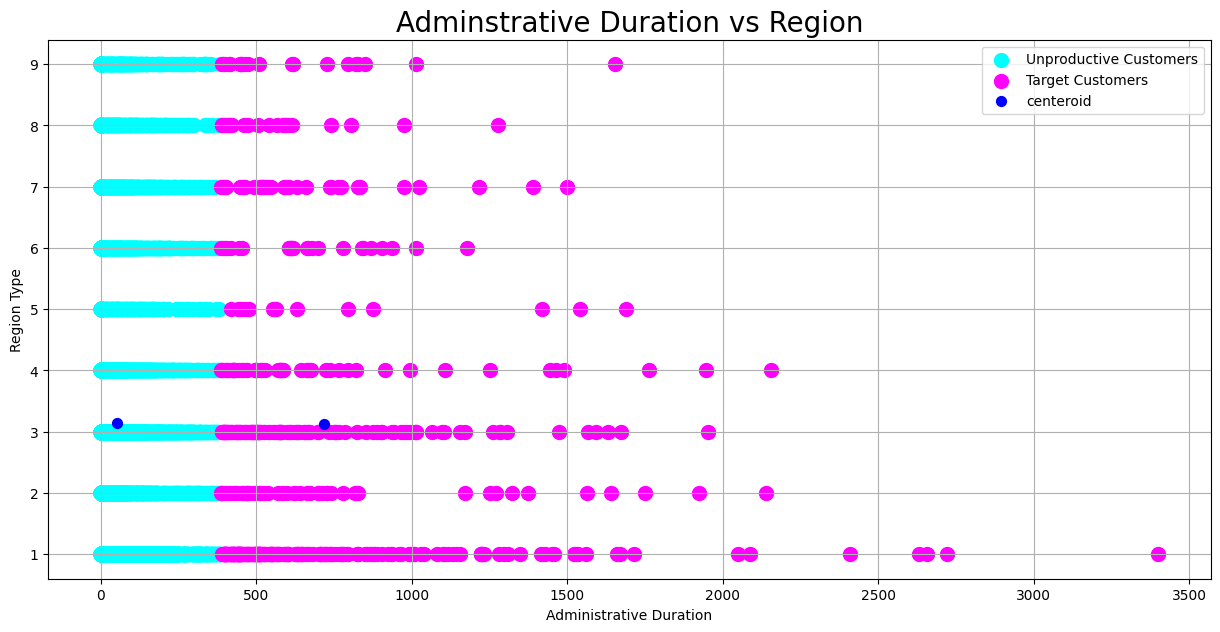

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'cyan', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

# Data Preprocessing
- One Hot and Label Encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# one hot encoding
df1 = pd.get_dummies(data)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [ ]:
# Label encoding of revenue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
df1['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [ ]:
# Label encoding of weekend

df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [ ]:
# Splitting dependent and independent variables(columns)
y = df1['Revenue']
x = df1.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 28)
Shape of y:  (12330,)


In [ ]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


Training Accuracy:  0.9998986212489862
Testing Accuracy:  0.8925385239253852
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2044
           1       0.76      0.54      0.63       422

    accuracy                           0.89      2466
   macro avg       0.84      0.75      0.79      2466
weighted avg       0.89      0.89      0.89      2466



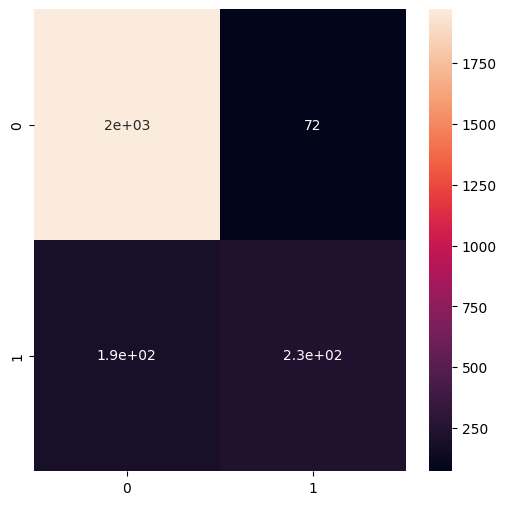

In [ ]:
# model define and training

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))



crnd = metrics.classification_report(y_test, y_pred)
print(crnd)
# confusion matrix
crnd = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(crnd, annot = True)
plt.show()

Training Accuracy:  0.9218369829683698
Testing Accuracy:  0.8901054339010543
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2044
           1       0.73      0.57      0.64       422

    accuracy                           0.89      2466
   macro avg       0.82      0.76      0.79      2466
weighted avg       0.88      0.89      0.88      2466



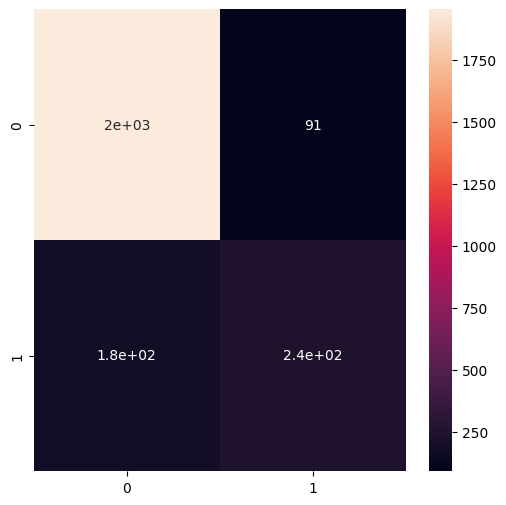

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
cgrd = metrics.classification_report(y_test, y_pred)
print(cgrd)

# confusion matrix
cgrd = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cgrd, annot = True)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# model define and training
model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
# classification report
cada = metrics.classification_report(y_test, y_pred)
print(cada)


Training Accuracy:  0.8981143552311436
Testing Accuracy:  0.8828061638280617
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2044
           1       0.69      0.57      0.63       422

    accuracy                           0.88      2466
   macro avg       0.80      0.76      0.78      2466
weighted avg       0.88      0.88      0.88      2466



In [ ]:
from sklearn.linear_model import LogisticRegression
# model define and training
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
# classification report
clr = metrics.classification_report(y_test, y_pred)
print(clr)

Training Accuracy:  0.8851378751013788
Testing Accuracy:  0.8682076236820763
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2044
           1       0.74      0.36      0.48       422

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



# Modelling : Support Vector Machine

In [ ]:
# model define and training
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.8514801297648013
Testing Accuracy:  0.8317112733171127


The model which is just build by Support vector machine gives us training accuracy 99.5% and testing accuracy 82.85%

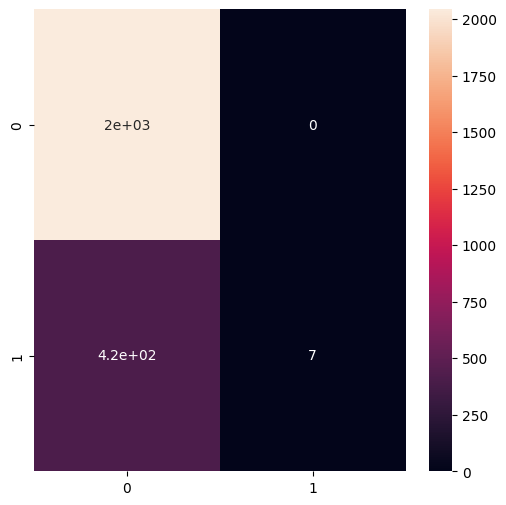

In [ ]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2044
           1       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466



# Modelling: Naive Bayes

In [ ]:
# model define and training
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.7982562854825629
Testing Accuracy:  0.7899432278994323


The model which is just build by Naive Bayes(Gaussian) gives us training accuracy 79.83% and testing accuracy 79.03%

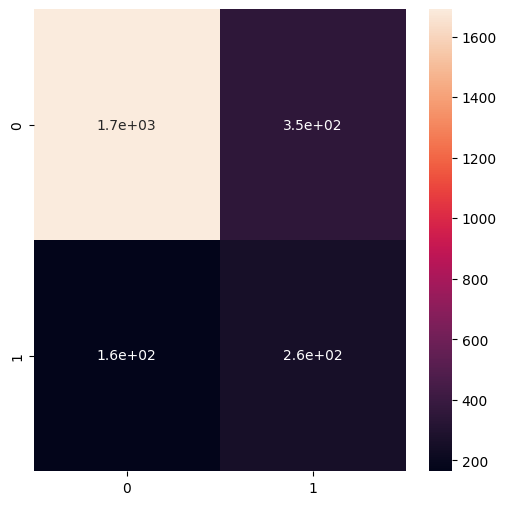

In [ ]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2044
           1       0.42      0.61      0.50       422

    accuracy                           0.79      2466
   macro avg       0.67      0.72      0.68      2466
weighted avg       0.83      0.79      0.80      2466



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model define and training

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))



crnd = metrics.classification_report(y_test, y_pred)
print(crnd)

Training Accuracy:  1.0
Testing Accuracy:  0.8901054339010543
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2044
           1       0.75      0.54      0.63       422

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
# classification report
crnd = metrics.classification_report(y_test, y_pred)
print(crnd)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2044
           1       0.75      0.54      0.63       422

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



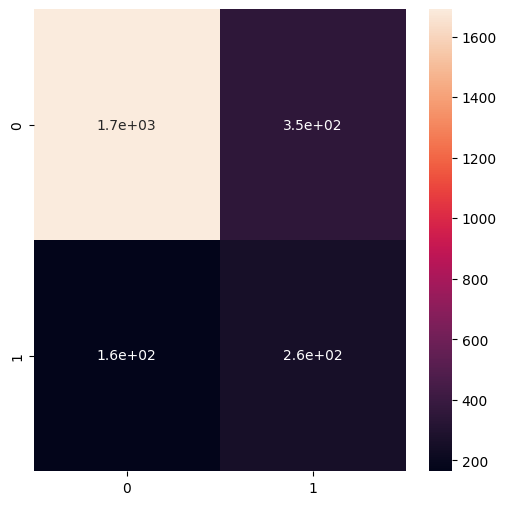

In [ ]:
# confusion matrix
crnd = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# model define and training
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.9218369829683698
Testing Accuracy:  0.8905109489051095


In [ ]:
# classification report
cgrd = metrics.classification_report(y_test, y_pred)
print(cgrd)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2044
           1       0.75      0.54      0.63       422

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



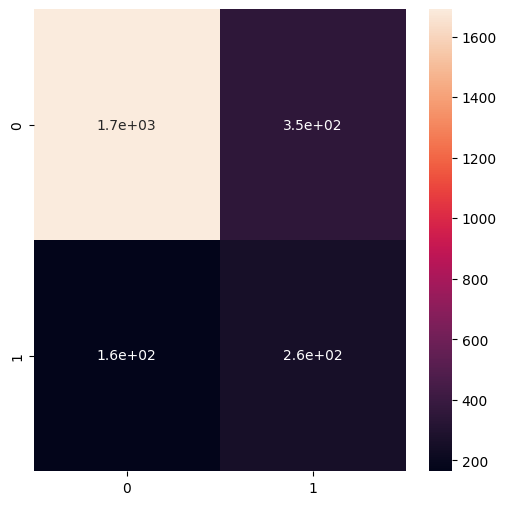

In [ ]:
# confusion matrix
cgrd= metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# model define and training
model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.8981143552311436
Testing Accuracy:  0.8828061638280617


In [ ]:
# classification report
cada = metrics.classification_report(y_test, y_pred)
print(cada)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2044
           1       0.69      0.57      0.63       422

    accuracy                           0.88      2466
   macro avg       0.80      0.76      0.78      2466
weighted avg       0.88      0.88      0.88      2466



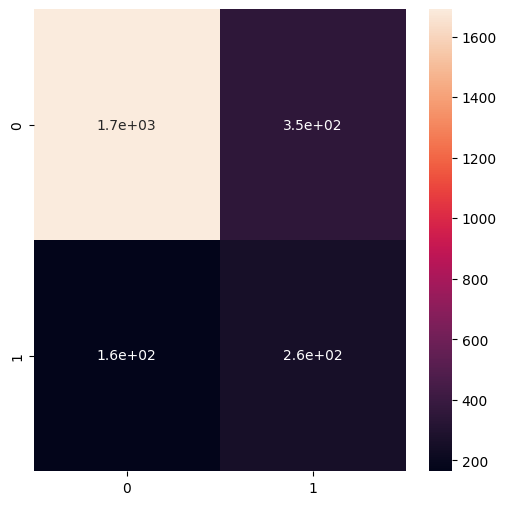

In [ ]:
# confusion matrix
cada= metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# model define and training
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.8851378751013788
Testing Accuracy:  0.8682076236820763


In [ ]:
# classification report
clr = metrics.classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2044
           1       0.74      0.36      0.48       422

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



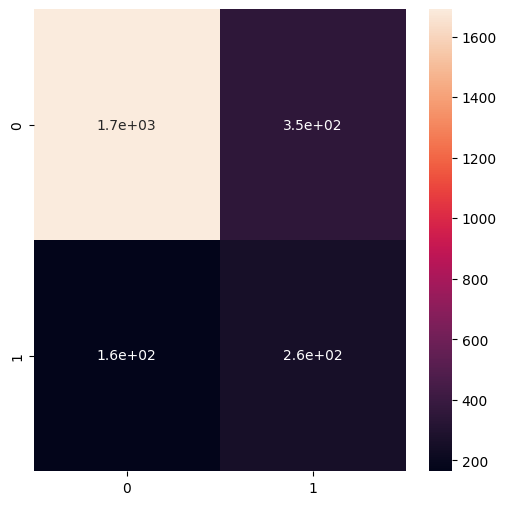

In [ ]:
# confusion matrix
clr= metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# model define and training
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.893146796431468
Testing Accuracy:  0.8519870235198702


In [ ]:
cknn = metrics.classification_report(y_test, y_pred)
print(cknn)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2044
           1       0.66      0.28      0.39       422

    accuracy                           0.85      2466
   macro avg       0.76      0.63      0.66      2466
weighted avg       0.83      0.85      0.83      2466



## Summary Table based on Two Learning Algorithm

In [ ]:
precision = ['Naive Bayes', 'precision', 0.91, 0.42]
recall = ['Naive Bayes', 'recall', 0.83, 0.61]
f1_score = ['Naive Bayes', 'f1_score', 0.87, 0.50 ]
###
precision2 = ['Support Vector Machine', 'precision', 0.83, 0.00 ]
recall2 = ['Support Vector Machine', 'recall', 1.0, 0.00 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.91, 0.00 ]
#######
precision3 = ['RF', 'precision', 0.94, 0.63 ]
recall3 = ['RF', 'recall', 0.96, 0.55 ]
f1_score3 = ['RF', 'f1_score', 0.94, 0.63 ]
#########
precision4 = ['GB', 'precision', 0.92, 0.73 ]
recall4 = ['GB', 'recall', 0.96, 0.57 ]
f1_score4 = ['GB', 'f1_score', 0.94, 0.64 ]
###########
precision5 = ['Adabost', 'precision', 0.91, 0.69 ]
recall5 = ['Adabost', 'recall', 0.95, 0.57 ]
f1_score5 = ['Adabost', 'f1_score', 0.93, 0.63 ]
##############
precision6 = ['LR', 'precision', 0.88, 0.74 ]
recall6 = ['LR', 'recall', 0.97, 0.36 ]
f1_score6 = ['LR', 'f1_score', 0.92, 0.48]
##############
precision7 = ['KNN', 'precision', 0.87, 0.66 ]
recall7 = ['KNN', 'recall', 0.97, 0.28 ]
f1_score7 = ['KNN', 'f1_score', 0.92, 0.39]
#####

table = pd.DataFrame([precision, precision2,precision3,precision4,precision5,precision6,precision7, recall, recall2,recall3,recall4,recall5,recall6,recall7, f1_score, f1_score2,f1_score3,f1_score4,f1_score5,f1_score6,f1_score7])
table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']
table

,model_name,metrics,Is_Revenue(False),Is_Revenue(True)
0,Naive Bayes,precision,0.91,0.42
1,Support Vector Machine,precision,0.83,0.00
2,RF,precision,0.94,0.63
3,GB,precision,0.92,0.73
4,Adabost,precision,0.91,0.69
5,LR,precision,0.88,0.74
6,KNN,precision,0.87,0.66
7,Naive Bayes,recall,0.83,0.61
8,Support Vector Machine,recall,1.00,0.00
9,RF,recall,0.96,0.55


array([[<Axes: title={'center': 'Is_Revenue(False)'}>,
        <Axes: title={'center': 'Is_Revenue(True)'}>]], dtype=object)

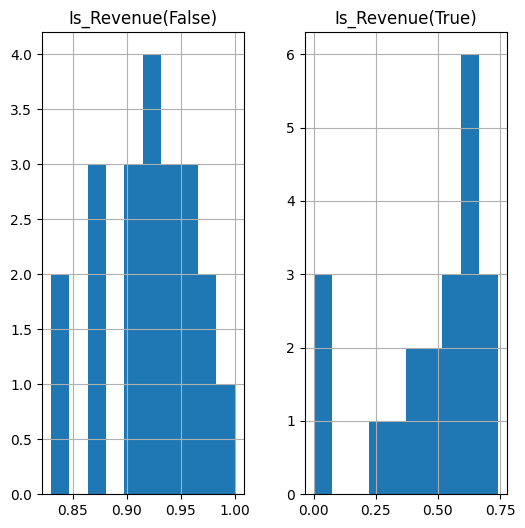

In [ ]:
table.hist()